In [257]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


os.chdir('G:\\DataScience\\recommandation system\\IBM')


In [258]:
data=pd.read_csv('train_5UKooLv.csv')


In [259]:
data.InvoiceDate.head()

0    01/12/10 8:26
1    01/12/10 8:26
2    01/12/10 8:26
3    01/12/10 8:26
4    01/12/10 8:26
Name: InvoiceDate, dtype: object

In [260]:
print(data.shape)
data.columns

(330575, 7)


Index(['CustomerID', 'InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'StockCode'],
      dtype='object')

In [261]:
data.isna().sum()

CustomerID     0
InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
StockCode      0
dtype: int64

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330575 entries, 0 to 330574
Data columns (total 7 columns):
CustomerID     330575 non-null int64
InvoiceNo      330575 non-null int64
Quantity       330575 non-null int64
InvoiceDate    330575 non-null object
UnitPrice      330575 non-null float64
Country        330575 non-null object
StockCode      330575 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 17.7+ MB


In [263]:
data.CustomerID==data.InvoiceNo

np.unique(data.CustomerID==data.InvoiceNo)

array([ True])

In [264]:
data.pop('InvoiceNo')

0          27270
1          27270
2          27270
3          27270
4          27270
5          27270
6          27270
7         427266
8         462735
9         462735
10        462735
11        462735
12        462735
13        462735
14        462735
15        462735
16        462735
17        462735
18        462735
19        462735
20        462735
21        462735
22        462735
23        462735
24        462735
25        462735
26        462735
27        262737
28        262737
29         62739
           ...  
330545    496395
330546    496395
330547    496395
330548    496395
330549    496395
330550    496395
330551    496395
330552    496395
330553    496395
330554    496395
330555    496395
330556    496395
330557    496395
330558    496395
330559    496395
330560    496395
330561    496395
330562    496395
330563    496395
330564    496395
330565    496395
330566    396396
330567    396396
330568    396396
330569    296397
330570    296397
330571    103599
330572    1035

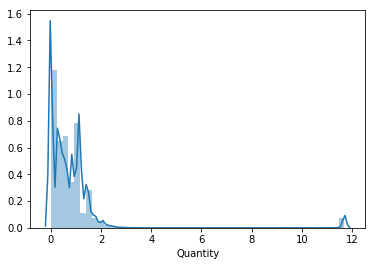

In [265]:
sns.distplot(np.log10(data.Quantity).fillna(data.Quantity.mean()))


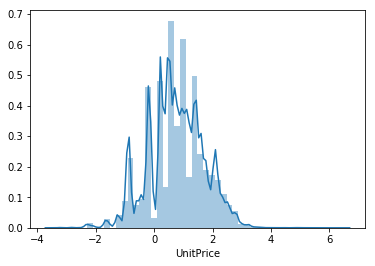

In [266]:
sns.distplot(np.log(data.UnitPrice.replace(0,0.1)))

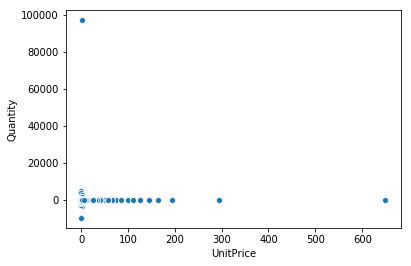

In [267]:
sns.scatterplot(data=data,y='Quantity',x='UnitPrice')

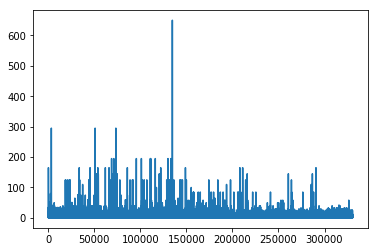

In [268]:
data.UnitPrice.plot()

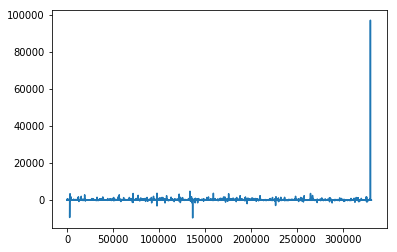

In [269]:
data.Quantity.plot()

In [270]:
data.StockCode.unique()


len(data.StockCode.unique())


3810

In [271]:
data['InvoiceDate'].head()

0    01/12/10 8:26
1    01/12/10 8:26
2    01/12/10 8:26
3    01/12/10 8:26
4    01/12/10 8:26
Name: InvoiceDate, dtype: object

In [272]:
data['InvoiceDate']=pd.to_datetime(data.loc[:,'InvoiceDate'],format='%d/%m/%y %H:%M')

data.InvoiceDate.head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [273]:
data.index=data.InvoiceDate
data.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:35:00',
               '2010-12-01 08:45:00', '2010-12-01 08:45:00',
               ...
               '2011-12-09 12:20:00', '2011-12-09 12:20:00',
               '2011-12-09 12:20:00', '2011-12-09 12:20:00',
               '2011-12-09 12:21:00', '2011-12-09 12:21:00',
               '2011-12-09 12:49:00', '2011-12-09 12:49:00',
               '2011-12-09 12:49:00', '2011-12-09 12:49:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=330575, freq=None)

In [274]:
data['amount']=(data.Quantity)*(data.UnitPrice)

In [275]:
data['amount'].head()

InvoiceDate
2010-12-01 08:26:00    17.85
2010-12-01 08:26:00    23.73
2010-12-01 08:26:00    24.75
2010-12-01 08:26:00    23.73
2010-12-01 08:26:00    23.73
Name: amount, dtype: float64

In [276]:
data_Item=data.StockCode.value_counts().sort_values(ascending=False)

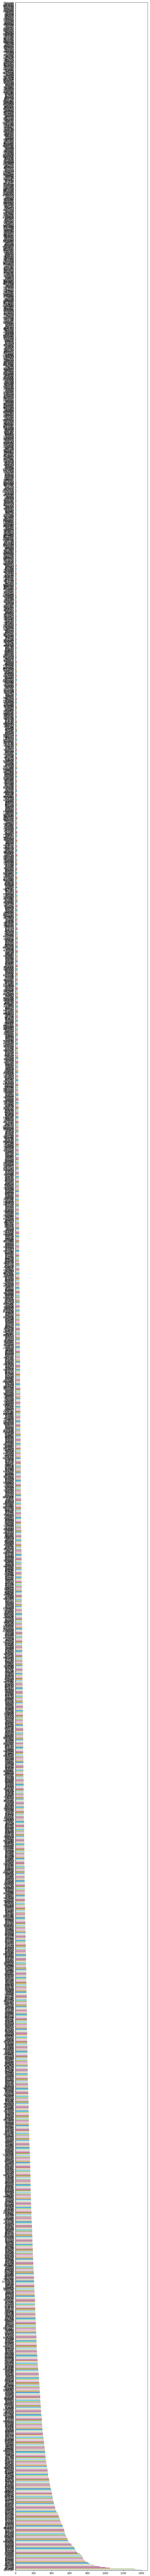

In [44]:
fig = plt.figure(figsize=(10,200))
data_Item.plot.barh()


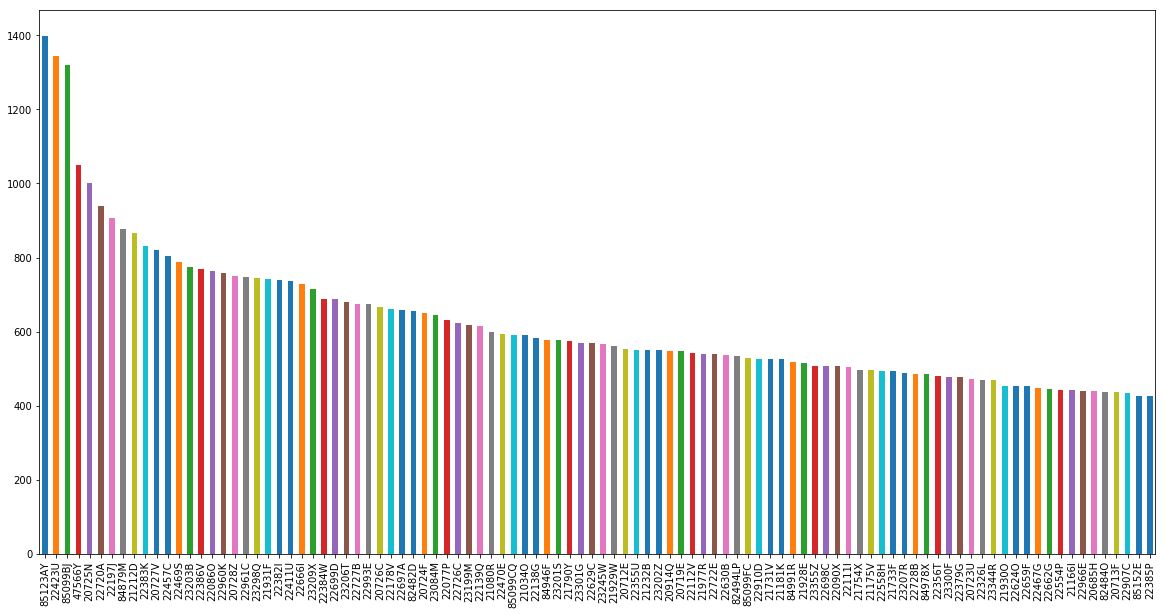

In [277]:
fig = plt.figure(figsize=(20,10))
data_Item[0:100].plot.bar()

In [282]:
data['year']=data.InvoiceDate.dt.year
data.year.head()

InvoiceDate
2010-12-01 08:26:00    2010
2010-12-01 08:26:00    2010
2010-12-01 08:26:00    2010
2010-12-01 08:26:00    2010
2010-12-01 08:26:00    2010
Name: year, dtype: int64

In [283]:
data['month']=data.InvoiceDate.dt.month
data.month.head()

InvoiceDate
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
Name: month, dtype: int64

In [284]:
data['day']=data.InvoiceDate.dt.day
data.day.head()

InvoiceDate
2010-12-01 08:26:00    1
2010-12-01 08:26:00    1
2010-12-01 08:26:00    1
2010-12-01 08:26:00    1
2010-12-01 08:26:00    1
Name: day, dtype: int64

In [285]:
data.StockCode=='85123AY'

data_1=data[data.StockCode=='85123AY']


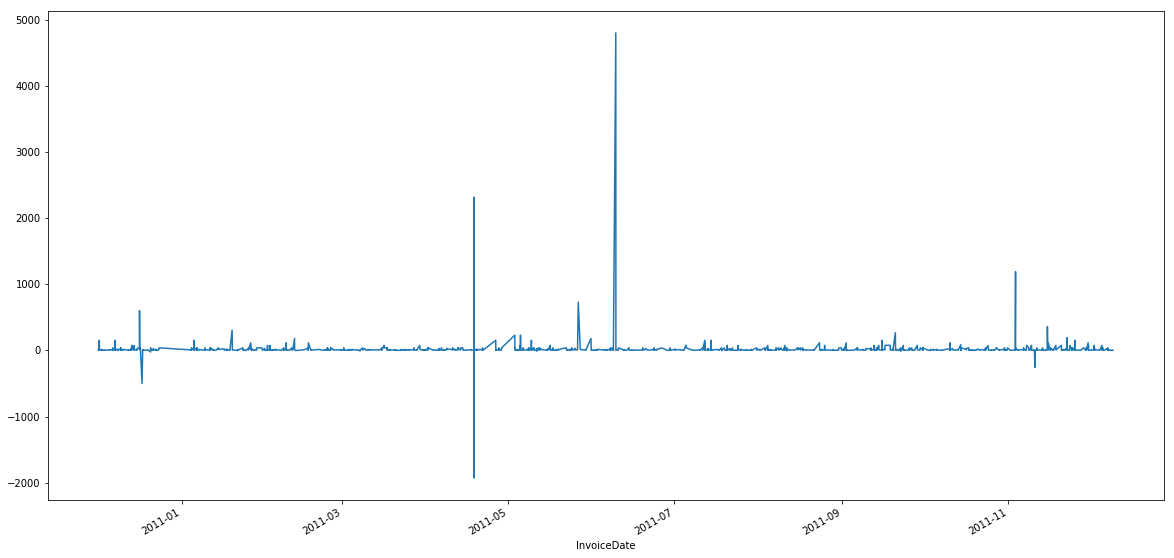

In [286]:
fig = plt.figure(figsize=(20,10))
data_1.Quantity.plot()

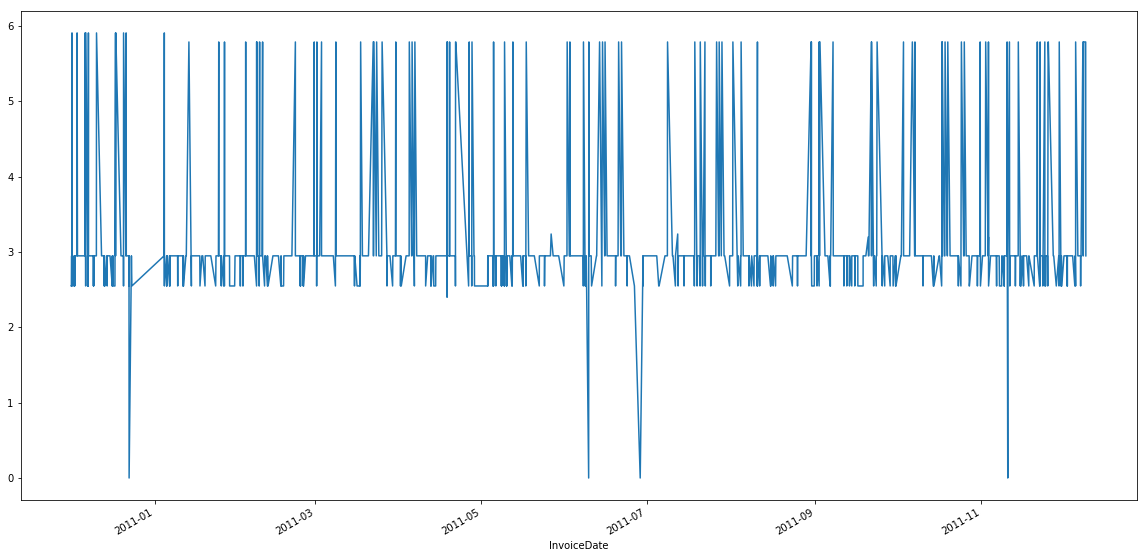

In [287]:
fig = plt.figure(figsize=(20,10))
data_1.UnitPrice.plot()

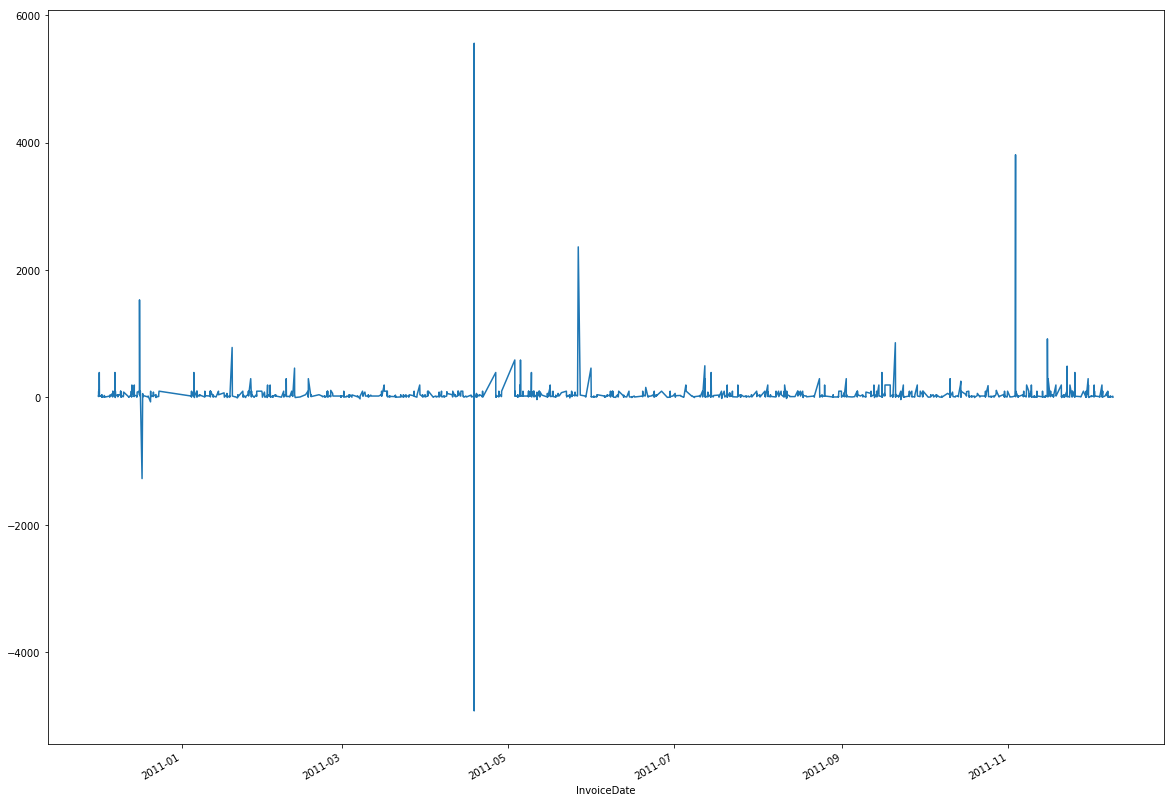

In [288]:
fig = plt.figure(figsize=(20,15))
data_1.amount.plot()

In [289]:
data.columns

Index(['CustomerID', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country',
       'StockCode', 'amount', 'year', 'month', 'day'],
      dtype='object')

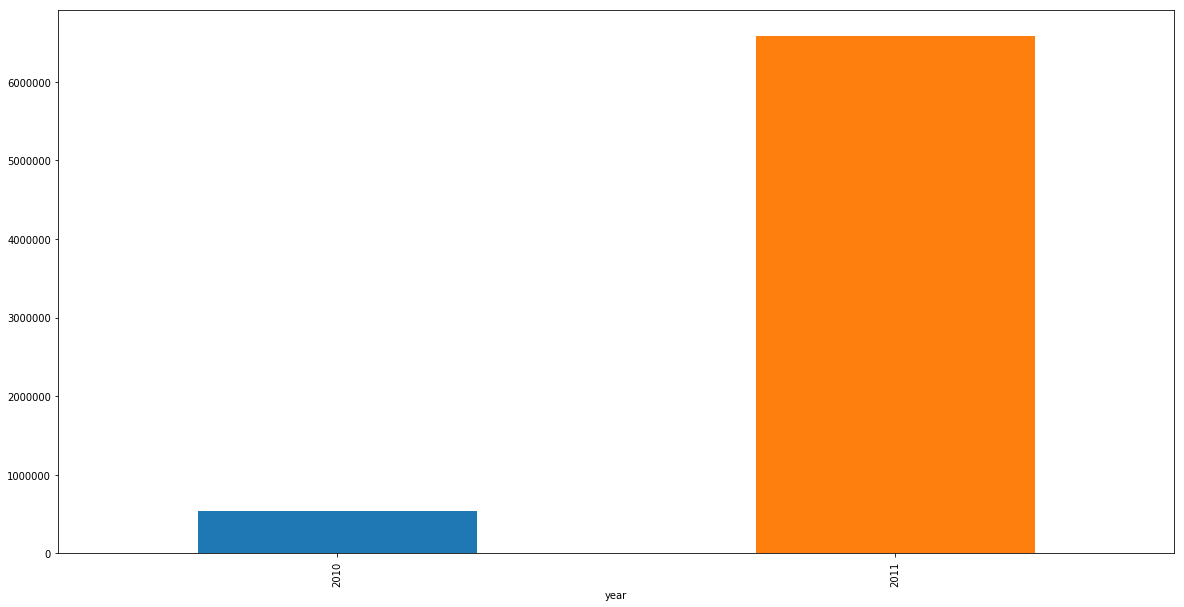

In [308]:
fig = plt.figure(figsize=(20,10))
data.groupby('year')['amount'].sum().plot.bar()

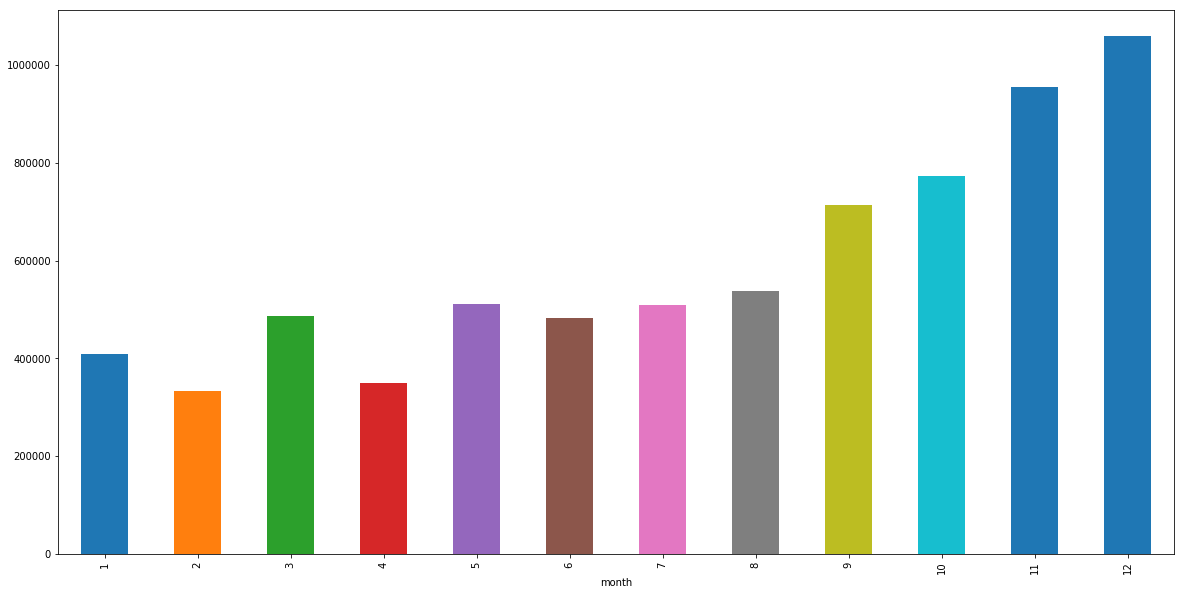

In [309]:
fig = plt.figure(figsize=(20,10))
data.groupby('month')['amount'].sum().plot.bar()

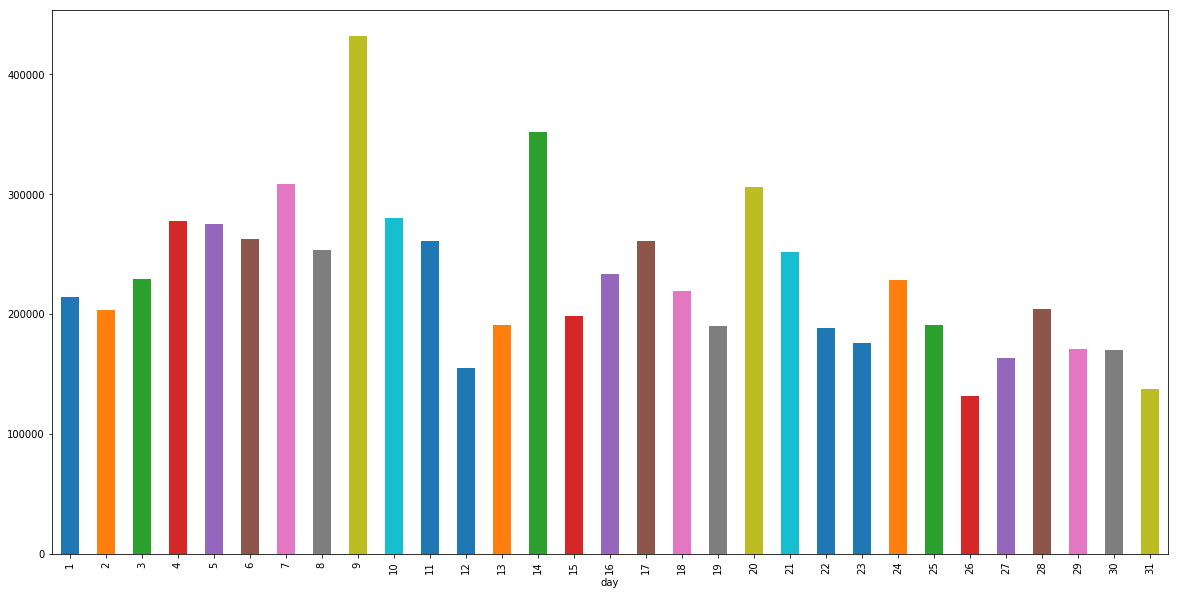

In [310]:
fig = plt.figure(figsize=(20,10))
data.groupby('day')['amount'].sum().plot.bar()

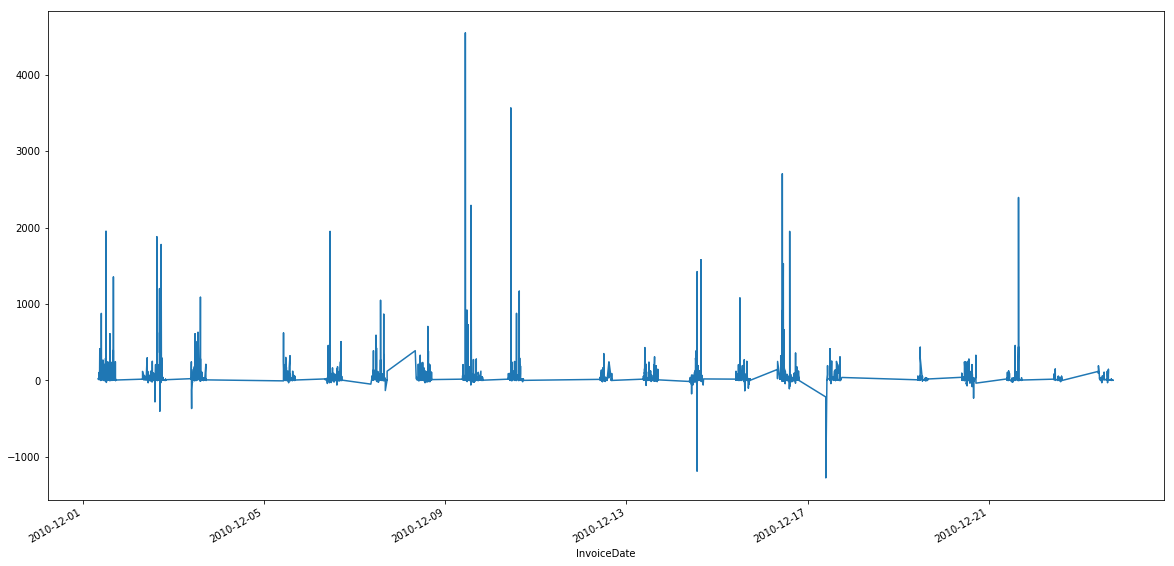

In [326]:
fig = plt.figure(figsize=(20,10))
data['2010'].amount.plot()


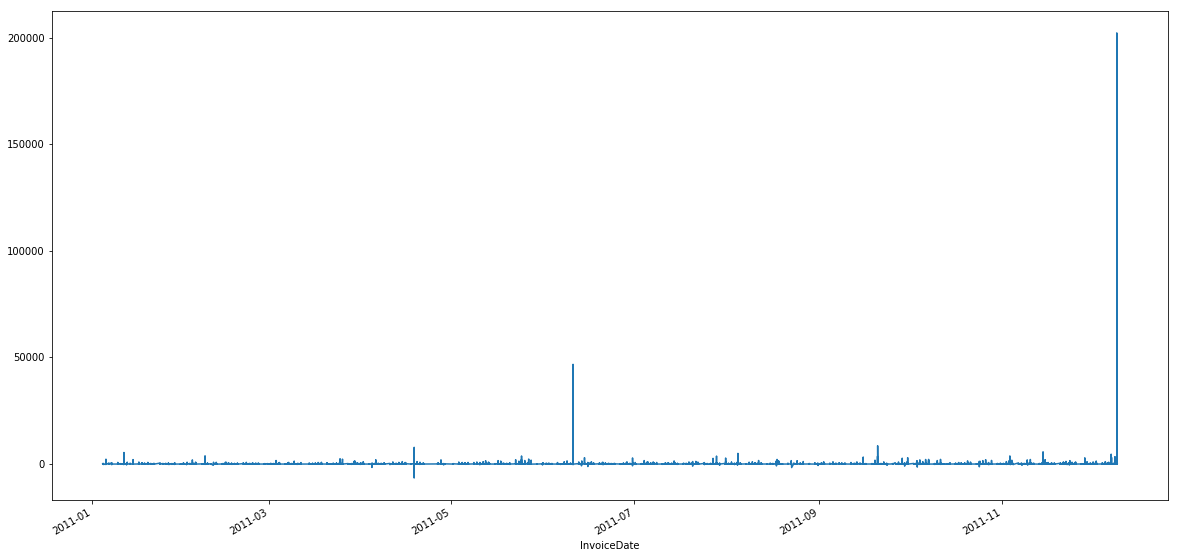

In [316]:
fig = plt.figure(figsize=(20,10))
data['2011'].amount.plot()